# New

/usr/local/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/usr/local/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


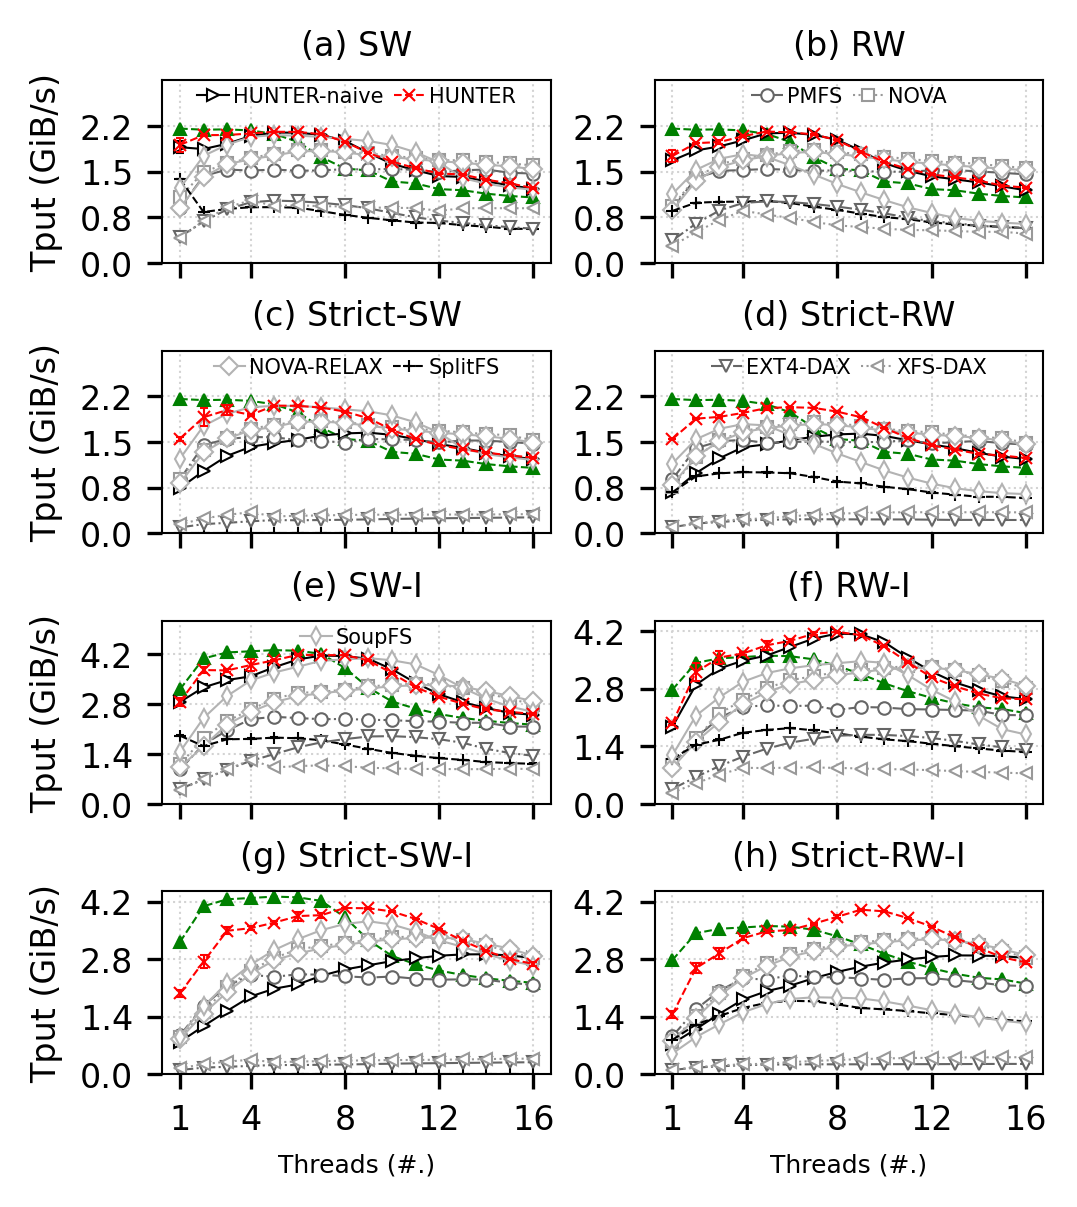

In [12]:
# ipython -c "%run plot.ipynb"

import matplotlib
from matplotlib import gridspec
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
plt.rcParams.update(plt.rcParamsDefault)
matplotlib.rcParams['text.usetex'] = False
%matplotlib inline
style.use('grayscale')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linestyle"] = ":"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["grid.color"] = "lightgray"
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

def add_explanation_and_title(fig, ax, exp, title, title_pad=10, title_fontsize=8, exp_fontsize=6):
    lable_pad = title_pad
    ax.set_xlabel(title, fontsize=title_fontsize, labelpad=lable_pad) 
    return [exp, title, title_pad, title_fontsize, exp_fontsize]
    
def adjust_explanation(fig, axes, context, filters):
    exp, title, title_pad, title_fontsize, exp_fontsize = context
    
    # plt.tight_layout()
    # fig.savefig("./temp.pdf", bbox_inches='tight', pad_inches=0)
    fig.savefig("./temp.pdf", bbox_inches='tight', pad_inches=0)
    # for ax in fig.axes:
        # plt.tight_layout()
        # Get the first xtick label
    midpoint = (0.5, 0.5)
    for idx, ax in enumerate(axes):
        xtick_label = ax.get_xticklabels()[0]
        label_bbox1 = xtick_label.get_window_extent()
        # print(label_bbox1)
        figure_pos1 = label_bbox1.transformed(ax.transAxes.inverted())
        
        # Get the xlabel object
        xlable = ax.xaxis.label
        label_bbox2 = xlable.get_window_extent()
        # print(label_bbox2)
        figure_pos2 = label_bbox2.transformed(ax.transAxes.inverted())
        midpoint = (0.5, (figure_pos1.y0 + figure_pos2.y1) / 2 + 0.08)
        
    print(midpoint)
    for idx, ax in enumerate(axes):
        if filters and filters[idx] == 1:
            continue
        explanation = ax.text(midpoint[0], midpoint[1], exp, ha='center', fontsize=exp_fontsize, transform=ax.transAxes)   

        # fig.savefig("./temp" + str(idx) + ".pdf", bbox_inches='tight', pad_inches=0)
        # # adjust midpoint
        # explanation_bbox = explanation.get_window_extent().transformed(ax.transAxes.inverted())
        # height = explanation_bbox.height
        # midpoint = (midpoint[0], midpoint[1] + height)
        # explanation.set_position(midpoint)

# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table", "r") as f:
    df_no_strict = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
with open("./performance-comparison-table-fsync", "r") as f:
    df_fsync = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
with open("./performance-comparison-table-interleaved", "r") as f:
    df_no_strict_int = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
with open("./performance-comparison-table-fsync-interleaved", "r") as f:
    df_fsync_int = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

df = df_no_strict
# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(10)))
fig.patch.set_facecolor('white')

line_width = 0.5 
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D", "+", "v", "<", "d", "^", "p", "h", "H", "X", "*", "|", "_"]
# seven line types
line_types = ["-", "--", "-.", ":", "-", "--", "-.", ":", "-", "--", "-.", ":"]
subtitles = ["(a) SW", "(b) RW", "(c) Strict-SW", "(d) Strict-RW", "(e) SW-I", "(f) RW-I", "(g) Strict-SW-I", "(h) Strict-RW-I"]

fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
# fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
ops = ["seq-write", "rnd-write", "seq-write", "rnd-write", "seq-write", "rnd-write", "seq-write", "rnd-write"]
num_jobs = list(range(1, 17))

# gs0 = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.6)
lines = []
ctx = None
cmap = "tab10"
for op_idx, op in enumerate(ops):
    # df = df_fsync if op_idx > 1 else df_no_strict
    if op_idx < 2:
        df = df_no_strict
    elif op_idx < 4:
        df = df_fsync
    elif op_idx < 6:
        df = df_no_strict_int
    else:
        df = df_fsync_int

    subfig = plt.subplot(4, 2, op_idx + 1)
    # subfig = plt.subplot(gs0[op_idx])
    for idx, fs in enumerate(fss):
        if fs == "PMM":
            line, = plt.plot(num_jobs, df[(df['file_system'] == fs) & (df['ops'] == op)]['bandwidth(MiB/s)'] / 1024, linewidth= line_width,label=fs, marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx], color="green")
            continue
        if (df is df_fsync or df is df_fsync_int) and fs == "HUNTER":
            fs = "HUNTER-SYNC"
        # line, = plt.plot(num_jobs, df[(df['file_system'] == fs) & (df['ops'] == op)]['bandwidth(MiB/s)'] / 1024, linewidth= line_width,label=fs, marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx])
        if fs == "HUNTER-J":
            line = plt.errorbar(num_jobs, df[(df['file_system'] == fs) & (df['ops'] == op)]['bandwidth(MiB/s)'] / 1024, yerr=df[(df['file_system'] == fs) & (df['ops'] == op)]['std-bandwidth(MiB/s)'] / 1024,  linewidth=line_width,label=fs, color="red", markerfacecolor="red", marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx],capsize=1, elinewidth=0.5, zorder=10)
        else:
            line = plt.errorbar(num_jobs, df[(df['file_system'] == fs) & (df['ops'] == op)]['bandwidth(MiB/s)'] / 1024, yerr=df[(df['file_system'] == fs) & (df['ops'] == op)]['std-bandwidth(MiB/s)'] / 1024,  linewidth=line_width,label=fs, markerfacecolor="white", marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx],capsize=1, elinewidth=0.5)

        lines.append(line)

    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    if (op_idx == 7 or op_idx == 6):
        plt.xticks([1, 4, 8, 12, 16], labels=[1, 4, 8, 12, 16], fontsize=8)
    else:
        plt.xticks([1, 4, 8, 12, 16], labels=[], fontsize=8)
    # plt.tick_params(bottom=False, top=False, left=False, right=False)

    if op_idx < 4:
        plt.ylim(0, 3)
        plt.yticks(np.linspace(0, 2.25, 4), fontsize=8)
    else:
        if op_idx == 4:
            plt.ylim(0, 5.2)
        else:
            plt.ylim(0, 4.5)
        plt.yticks(np.linspace(0, 4.25, 4), fontsize=8)
        
    # if op_idx == 0 or op_idx == 1:
    # else:
    #     plt.yticks(np.linspace(1, 6.6, 4), fontsize=8)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))

    # subfig.text(0.5, -0.3, "Threads (#.)", ha='center', va='center', fontsize=6, transform=subfig.transAxes)
    # plt.xlabel("Threads (#.)", fontsize=8) 
    # plt.title(subtitles[op_idx], fontsize=8, loc='center')
    plt.title(subtitles[op_idx], fontsize=8)
    if (op_idx == 7 or op_idx == 6):
        # ctx = add_explanation_and_title(fig, subfig, "Threads (#.)", subtitles[op_idx], title_pad=10, title_fontsize=8, exp_fontsize=6)
        plt.xlabel("Threads (#.)", fontsize=6)
    else:
        # plt.xlabel([], fontsize=8)
        plt.xticks([1, 4, 8, 12, 16], labels=[], fontsize=8)

    if op_idx % 2 == 0:
        plt.ylabel('Tput (GiB/s)', fontsize=8)
        
fss.replace("SplitFS-FIO", "SplitFS", inplace=True)
fss.replace("HUNTER", "HUNTER-naive", inplace=True)
fss.replace("HUNTER-J", "HUNTER", inplace=True)

# get handles
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles[1:]]
# use them in the legend
# ax1.legend(handles, labels, loc='upper left',numpoints=1)

# fig.legend(handles[:len(fss) - 1], fss, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=4, fontsize=8, frameon=False, columnspacing=0., handletextpad=0.2, borderaxespad=0.1, handlelength=1.5)

steps = [2, 2, 2, 2, 2, 0, 0, 0]
cols = [2, 2, 2, 2, 2]
for ax_id, ax in enumerate(fig.axes):
    if steps[ax_id] == 0:
        continue
    start = sum(steps[:ax_id])
    end = start + steps[ax_id]

    leg = ax.legend(handles[start : end], fss[start : end], loc='upper center', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=cols[ax_id], fontsize=5, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)

# fig.text(0.03, 0.55, "Throughput (GiB/s)", va='center', rotation='vertical', fontsize=8)
plt.tight_layout(pad=0.4)
# adjust_explanation(fig, fig.axes, ctx, [1, 1, 1, 1, 1, 1, 0, 0])
# gs0.tight_layout(fig)
plt.savefig("./FIG-Concurrency.pdf", bbox_inches='tight')
